# STAT207 Mini-Project #1 - Cause for Casualties Analysis

Connor Slattery

In [114]:
#Imports here
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

## 1. Introduction

## Research Question: 
How does the relationship between Casualties and Weather Conditions change when categorized by Cause in this dataset? 

## Research Motivation: 
I wanted to explore the correlation between weather conditions, causes of accidents, and the number of casualties. Investigating the connection between these variables helps car manufacturers, governments, urban planners, insurers, and drivers better understand accident patterns/trends and create better safety features on the road, in vehicles, and in creating law. Investigating these connections, I wanted to determine if there are specific weather conditions and causes of accidents that result in higher number of casualties.

## 2. Dataset Discussion

The dataset I downloaded from Kaggle contains 10,000 traffic accident records. I selected three specific columns to analyze: Casualties, Weather Condition, and Cause. These variables allowed me to investigate the severity of accidents between different weather conditions and consider the 'cause' of the accident.

Where to find dataset: https://www.kaggle.com/datasets/adilshamim8/global-traffic-accidents-dataset/data 

I recently downloaded it on aprox. 2/14/2025

### Original Dataset Information: 
1. Every row is a reported traffic accident from around the world, with information about when and where the accident occurred, road conditions, weather, number of vehicles involved, casualties, and cause.
2. From the website - "The dataset is synthetically generated based on real-world accident trends from global reports. It simulates diverse geographic locations, weather conditions, and accident causes, making it ideal for academic and research purposes."
3. No, this dataset does not include all possible traffic observations. Possible missing observations include age and driving history. 
4. Since this dataset does not include age and driving history, the analysis results should be carefully interpreted. Since these variables are very important, researchers or policymakers using this data to enhance road safety should note its limitations and add additional information to complement their analysis. 
5. - Casualties: The total number of injuries and fatalities caused by the accident.
    - Cause: The primary reason for the accident (e.g., Speeding, Drunk Driving, Distracted Driving)
    - Weather Condition: The weather during the accident (e.g., Clear, Rain, Fog, Snow).

In [115]:
df = pd.read_csv('global_traffic_accidents.csv')
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [116]:
df.shape[0]

10000

## 3. Dataset Cleaning

After choosing the individual columns, I confirmed that no missing values existed. I also looked at unique values for each variable and found them clearly defined. There were no obvious outliers in each column's boxplot, which indicates that the dataset is clean and ready for analysis.

In [117]:
selected_columns = df[['Casualties', 'Weather Condition', 'Cause']]
selected_columns

,Casualties,Weather Condition,Cause
0,7,Snow,Reckless Driving
1,1,Clear,Drunk Driving
2,7,Rain,Reckless Driving
3,0,Storm,Drunk Driving
4,9,Storm,Reckless Driving
...,...,...,...
9995,10,Storm,Distracted Driving
9996,9,Storm,Weather Conditions
9997,3,Snow,Weather Conditions
9998,3,Storm,Drunk Driving


In [118]:
original_rows = selected_columns.shape[0]
original_rows

10000

In [119]:
selected_columns.dtypes

Casualties            int64
Weather Condition    object
Cause                object
dtype: object

In [120]:
selected_columns.isna().sum()

Casualties           0
Weather Condition    0
Cause                0
dtype: int64

In [121]:
np.unique(df['Casualties'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [122]:
np.unique(df['Weather Condition'])

array(['Clear', 'Fog', 'Hail', 'Rain', 'Snow', 'Storm'], dtype=object)

In [123]:
np.unique(df['Cause'])

array(['Distracted Driving', 'Drunk Driving', 'Mechanical Failure',
       'Reckless Driving', 'Speeding', 'Weather Conditions'], dtype=object)

In [124]:
cause_counts = selected_columns['Cause'].value_counts()
weather_counts = selected_columns['Weather Condition'].value_counts()
cause_counts,weather_counts

(Cause
 Drunk Driving         1716
 Reckless Driving      1685
 Weather Conditions    1657
 Speeding              1656
 Mechanical Failure    1653
 Distracted Driving    1633
 Name: count, dtype: int64,
 Weather Condition
 Rain     1681
 Clear    1674
 Hail     1673
 Snow     1667
 Fog      1660
 Storm    1645
 Name: count, dtype: int64)

There seem to be no missing/NA values, and all unique values are recognized without any out-of-place, with at least 10 observations in the dataset that correspond to them.

### Outlier Cleaning

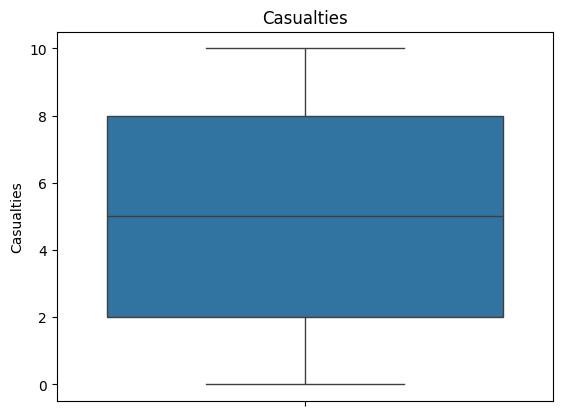

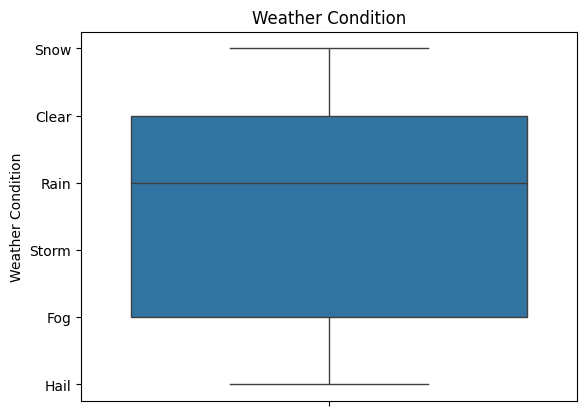

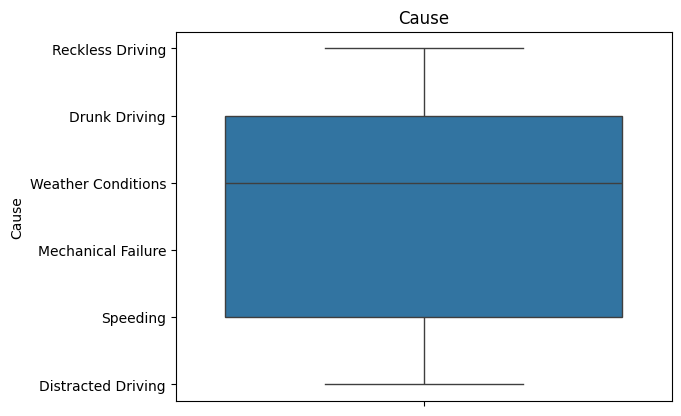

In [125]:
for col in selected_columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

As shown in each boxplot, there are no significant outliers within the interquartile range for each column. This is good news; the dataset is clean and has no outliers. I currently cannot determine other means of locating outliers and cleaning in this clean dataset.

## 4. <u>Research Question</u>: How does the Relationship between `Weather Conditions (x)` and `Casualties (y)` Change based on Different Values of `Cause (z)` in the Dataset?

I initially checked for summary statistics by group to examine the correlation between Weather Conditions, Casualties, and Causes. The average casualties across causes and weather conditions varied slightly, but nothing visualized a trend. The highest and lowest casualty rates were not vastly different for most groups.
I then ran a regression analysis to see if correlations between Weather Conditions, Cause, and Casualties were significant. The OLS regression model generated p-values for all variables. Statistical significance would be less than 0.05, but the p-values for all variables were higher than this. This means that weather conditions and causes did not significantly impact casualties in this data. The R-squared value was also very low (0.00078), which means the model accounts for no variance in casualties.

Research Question: How does the relationship between Casualties and Weather Conditions change when categorized by Cause in this dataset? 

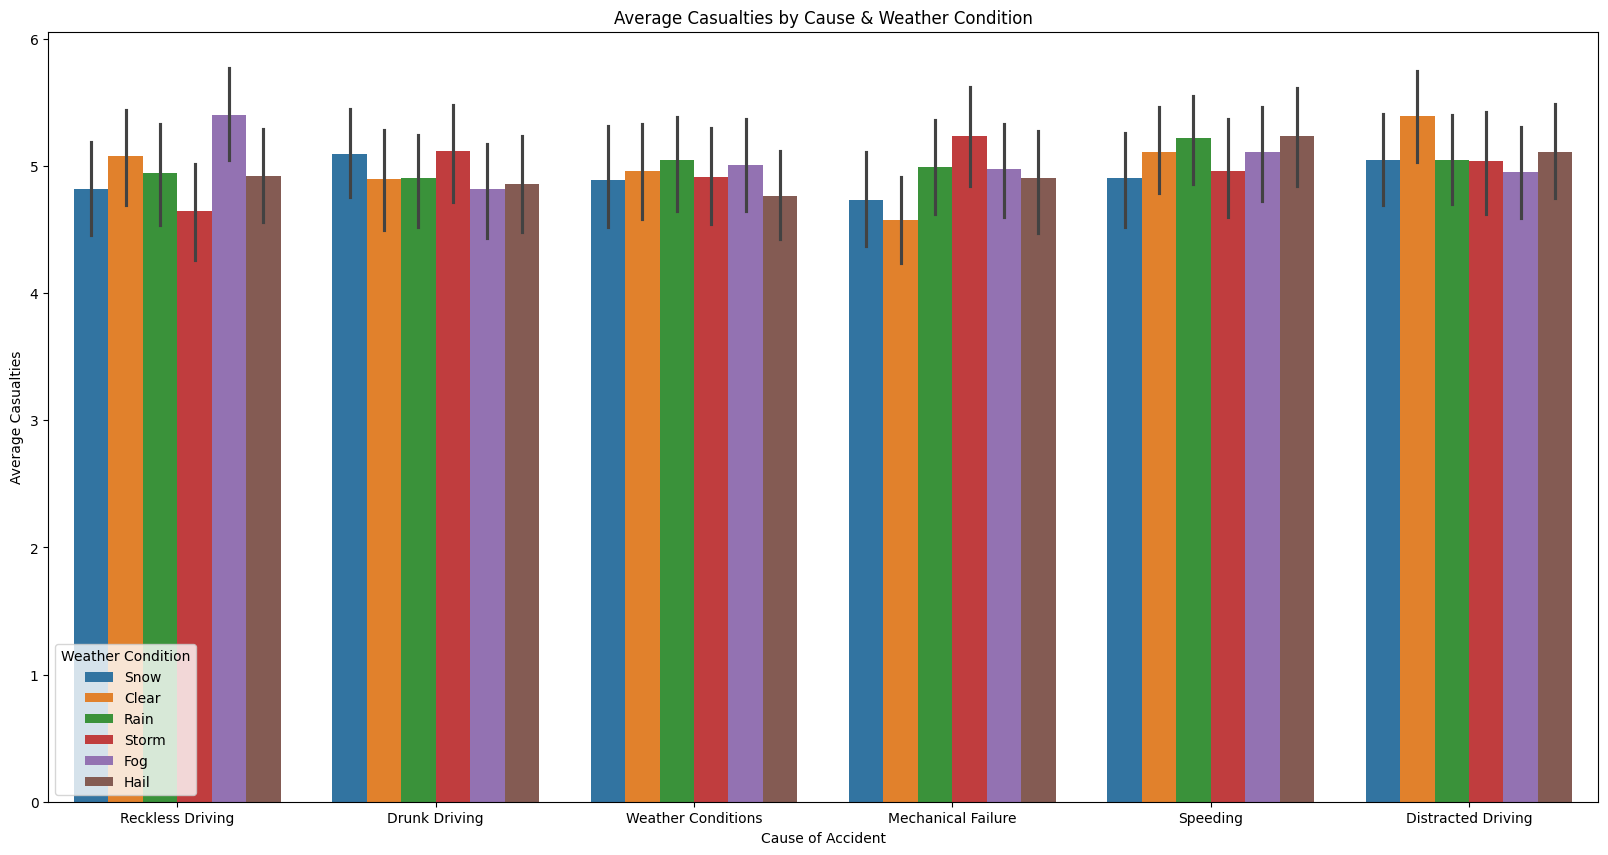

In [126]:
plt.figure(figsize=(20, 10))

sns.barplot(data=selected_columns, x='Cause', y='Casualties', hue='Weather Condition')
plt.title('Average Casualties by Cause & Weather Condition')
plt.xlabel('Cause of Accident')
plt.ylabel('Average Casualties')
plt.show()

In [127]:
summary_stats = selected_columns.groupby(['Cause', 'Weather Condition'])['Casualties'].agg(['count', 'mean', 'median', 'std', 'sum'])
summary_stats

count      mean  median       std   sum
Cause              Weather Condition                                         
Distracted Driving Clear                261  5.394636     5.0  2.980935  1408
                   Fog                  266  4.954887     5.0  3.072371  1318
                   Hail                 289  5.107266     5.0  3.155504  1476
                   Rain                 284  5.049296     5.0  3.079230  1434
                   Snow                 277  5.050542     5.0  3.034400  1399
                   Storm                256  5.039062     5.0  3.165754  1290
Drunk Driving      Clear                268  4.899254     5.0  3.205963  1313
                   Fog                  307  4.817590     4.0  3.253849  1479
                   Hail                 279  4.860215     5.0  3.140332  1356
                   Rain                 281  4.903915     5.0  3.115861  1378
                   Snow                 285  5.091228     5.0  3.113820  1451
                   Storm                296  5.114865     5.0  3.315140  1514
Mechanical Failure Clear                294  4.578231     4.0  3.032081  1346
                   Fog                  267  4.973783     5.0  3.080875  1328
                   Hail                 265  4.901887     5.0  3.116093  1299
                   Rain                 284  4.989437     5.0  3.079034  1417
                   Snow                 274  4.733577     4.0  3.210303  1297
                   Storm                269  5.237918     5.0  3.049818  1409
Reckless Driving   Clear                279  5.078853     5.0  3.199744  1417
                   Fog                  288  5.399306     5.0  3.048436  1555
                   Hail                 284  4.922535     5.0  3.138891  1398
                   Rain                 257  4.941634     4.0  3.142529  1270
                   Snow                 293  4.819113     5.0  3.192142  1412
                   Storm                284  4.647887     5.0  3.269296  1320
Speeding           Clear                287  5.108014     5.0  3.115297  1466
                   Fog                  258  5.108527     5.0  2.994782  1318
                   Hail                 271  5.232472     5.0  3.154276  1418
                   Rain                 297  5.218855     5.0  3.042922  1550
                   Snow                 270  4.903704     5.0  2.985402  1324
                   Storm                273  4.959707     5.0  3.215631  1354
Weather Conditions Clear                285  4.961404     5.0  3.224344  1414
                   Fog                  274  5.007299     5.0  3.014000  1372
                   Hail                 285  4.764912     4.0  3.155171  1358
                   Rain                 278  5.043165     5.0  3.274164  1402
                   Snow                 268  4.891791     5.0  3.161011  1311
                   Storm                267  4.910112     5.0  3.087595  1311

In [128]:
import statsmodels.formula.api as smf
filtered_columns = selected_columns.rename(columns={'Weather Condition': 'Weather_Condition'})

formula = smf.ols('Casualties ~ Cause + Weather_Condition', data=filtered_columns).fit()
formula.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.1076,0.105,48.771,0.000,4.902,5.313
Cause[T.Drunk Driving],-0.1509,0.108,-1.394,0.163,-0.363,0.061
Cause[T.Mechanical Failure],-0.2009,0.109,-1.839,0.066,-0.415,0.013
Cause[T.Reckless Driving],-0.1290,0.109,-1.186,0.236,-0.342,0.084
Cause[T.Speeding],-0.0081,0.109,-0.074,0.941,-0.222,0.206
Cause[T.Weather Conditions],-0.1693,0.109,-1.551,0.121,-0.383,0.045
Weather_Condition[T.Fog],0.0464,0.108,0.428,0.669,-0.166,0.259
Weather_Condition[T.Hail],-0.0344,0.108,-0.318,0.751,-0.247,0.178
Weather_Condition[T.Rain],0.0281,0.108,0.260,0.795,-0.184,0.240
Weather_Condition[T.Snow],-0.0821,0.108,-0.758,0.448,-0.294,0.130


In [129]:
y_test = filtered_columns['Casualties']
y_pred_test = formula.predict(filtered_columns)

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_test)
r_squared

0.0007885817098767234

### Key Findings 

- p-values > 0.5
- R^2 = 0.000788


The average casualty differences between causes and weather conditions were negligible, typically below 0.3 casualties.
Reckless Driving recorded the most significant casualty rate during foggy conditions, while Distracted Driving and Speeding had visually simular casualties.
The OLS regression model found no significant statistical correlation between weather conditions, accident causes, and casualties, supported by high p-values and low R-squared values. 

## 5. Conclusion

This analysis did not find strong evidence that weather and accident causes significantly affect the number of casualties in this data set. This means that other variables, such as road conditions, location, and time, might affect the number of accidents. Further investigation with additional variables may reveal what makes casualties in traffic accidents different. Others could use my outcome as a learning moment or a challenge to identify further possible correlations in the variables I chose. In the future, I would like to see additional data on driver history and age to see if those variables play a role in providing an answer to this question. Since this dataset does not have those metrics, I can only assume that the variable I chose could not answer the correlation to casualties in this dataset. 